In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

In [ ]:
from sklearn.linear_model import LogisticRegression # model and weights

In [ ]:
from google.colab import drive

# --- 1. MOUNT DRIVE FIRST ---
# This creates the link to your permanent storage.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
import pandas as pd
import io

# 1. This will open the file browser. Select your CSV.
print("Please select your CSV file for upload...")
uploaded = files.upload()

# 2. Read the file
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

print(f"Dataframe loaded successfully from {file_name}!")

Please select your CSV file for upload...


Saving loan_data (1).csv to loan_data (1) (1).csv
Dataframe loaded successfully from loan_data (1) (1).csv!


In [ ]:
# The permanent path on  Google Drive
permanent_path = '/content/drive/MyDrive/final_processed_data.csv'

# Save  DataFrame to the permanent location
df.to_csv(permanent_path, index=False)

print(f"✅ File successfully saved to Google Drive: {permanent_path}")

✅ File successfully saved to Google Drive: /content/drive/MyDrive/final_processed_data.csv


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score # model evaluation

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
pip install scikit-learn


In [ ]:
pip install matplotlib

In [ ]:
pip install numpy

In [ ]:
try:
    # Use the combination of parameters that finally worked:
    # Full path, cp1252 encoding, and the flexible python engine
    df = pd.read_csv(
        file_name,
        # We load the full DataFrame now to check for all missing values
        encoding='cp1252',
        engine='python'
    )
     # Check if the critical column exists, assuming standard comma delimiter
    if 'TARGET' not in df.columns:
        raise KeyError("Could not find the 'TARGET' column. Check the file's separator (it might be a semicolon ';').")

    print("--- SUCCESS: Data Loaded ---")

# message for file path

except FileNotFoundError:
    print(f"FATAL ERROR: File '{file_name}' not found. Ensure the path is correct.")
    raise

except Exception as e:
    print(f"\nCRITICAL FAILURE: Could not load the file. Error details: {e}")
    raise

--- SUCCESS: Data Loaded ---


In [ ]:
# print missing values
print("\n--- DATA QUALITY CHECK ---")
print("Total number of missing (NaN) values per column:")
# The .isnull() method checks for nulls; .sum() counts them per column
print(df.isnull().sum())
print("--------------------------\n")


--- DATA QUALITY CHECK ---
Total number of missing (NaN) values per column:
SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64
--------------------------



In [ ]:
df_target = df['TARGET']
y =df['TARGET'].astype(int)
weights = compute_class_weight(
    class_weight = 'balanced',
    classes=np.unique(y),
    y=y
)

target_counts = df_target.value_counts()
N_0 = target_counts.loc[0]
N_1 = target_counts.loc[1]
N_total = N_0 + N_1

print(f"Raw Count of TARGET=0 (Repaid): {N_0}")



Raw Count of TARGET=0 (Repaid): 282686


In [ ]:
df_target = df['TARGET']
y =df['TARGET'].astype(int)
weights = compute_class_weight(
    class_weight = 'balanced',
    classes=np.unique(y),
    y=y
)

target_counts = df_target.value_counts()
N_0 = target_counts.loc[0]
N_1 = target_counts.loc[1]
N_total = N_0 + N_1

print(f"Raw Count of TARGET=0 (Repaid): {N_0}")



Raw Count of TARGET=0 (Repaid): 282686


In [ ]:
df_target = df['TARGET']
y =df['TARGET'].astype(int)
weights = compute_class_weight(
    class_weight = 'balanced',
    classes=np.unique(y),
    y=y
)

target_counts = df_target.value_counts()
N_0 = target_counts.loc[0]
N_1 = target_counts.loc[1]
N_total = N_0 + N_1

print(f"Raw Count of TARGET=0 (Repaid): {N_0}")
print(f"Raw Count of TARGET=1 (Default): {N_1}")



Raw Count of TARGET=0 (Repaid): 282686
Raw Count of TARGET=1 (Default): 24825


In [ ]:
# round the weights for clean output
class_weights_final = {i:round(weight, 3) for i, weight in enumerate(weights) }
print("\nFinal Class Weights Dictionary (formodel.fit(class_weights))")
print(class_weights_final)


Final Class Weights Dictionary (formodel.fit(class_weights))
{0: np.float64(0.544), 1: np.float64(6.194)}


In [ ]:
# N_0 default percentage
default_percentage = (N_1 / N_total) * 100
print(f"\nAssignment step 3 result percentage defaults (TARGET=1): {default_percentage:.2f}%")


Assignment step 3 result percentage defaults (TARGET=1): 8.07%


In [ ]:
# data is imbalanced 'TARGET'=1 : 91.93%
# balance data with logistic regression model
# use weights put into a dictionary to balance the data
# N(total) = NRepaid+NDefault
# N(total) = 49,529
# 45,532(repaid) and 3, 997 (Default)
# wi = N_total/C x Ni, 49,529/91,064 = 0.5439 low weight for majority class
# wi = N_total/C x Ni, 49,529/7,994 = 6.19 high weight for minority class
# 6.19 is the minority class weight used to fixed the 8.07 imbalance

# split the data then create testing sets
# use stratify=y for imbalanced data
# same 8.07 default rate
# make x and y separate features start with droping x
x = df.drop(columns=['TARGET', 'ID_COLUMN_NAME'], errors='ignore')
#y = df_full['TARGET']

# one hot code encoder for the error recieved value error
# could convert string to float: 'Cash loans'
# logistic regression could not see it by it self
# dataframe has text columns that need to be converted to numbers

categorical_cols = x.select_dtypes(include=['object']).columns # find all columns that have text data  use object data type
x = pd.get_dummies(x, columns=categorical_cols, drop_first=True) # pd.get_dummies used to encode values creates a new binary category column
# for the value error correction input contains NaN, infinity or value too large

print("\n--- FIXING MISSING VALUES (Imputation) ---")
# Impute all remaining NaNs (from both numeric and newly created dummy columns)
# with the median of that column.
x = x.fillna(x.median())
print(f"NaNs remaining in X after imputation: {x.isnull().sum().sum()}")
# This sum should be 0.

# clean up missing values for nan column
print("\n--- nan column data clean up")

# replace inf val with  nan
x = x.replace([np.inf, -np.inf], np.nan)

# drop columns all val are missing
x = x.dropna(axis=1, how='all')
print(f"Number of columns dropped due to all NaN {len(x.columns) - len(df.columns) +2 }")

# impute all remaning nan from both the dummies (encoded) and already existing numeric columns
# with median

x = x.fillna(x.median())
print(f"NaNs remaining in X after imputation: {x.isnull().sum().sum()}")



--- FIXING MISSING VALUES (Imputation) ---
NaNs remaining in X after imputation: 0

--- nan column data clean up
Number of columns dropped due to all NaN 109
NaNs remaining in X after imputation: 0


In [ ]:
# split the data but the data is now encoded same process but with new binary category

x_train, x_test, y_train, y_test = train_test_split(
    x, #features
    y, #target
    test_size=0.2,
    random_state=42,
    stratify=y,
)

print(f"\n---Data Split Complete ---")
print(f"Total Training Samples: {len(x_train)}")
print(f"Total Testing Samples: {len(x_test)}")


---Data Split Complete ---
Total Training Samples: 246008
Total Testing Samples: 61503


In [ ]:
# model training: applying class weights
# define model
# "solver=liblinear" good for binary scaling

# ensure all data is numeric before scaling
x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LogisticRegression(solver='saga',
                           random_state=42,
                           max_iter= 5000,
                           class_weight=class_weights_final,
                           tol=0.01
)


# train model
model.fit(
    x_train_scaled, # call scaled training features
    y_train
)


print("\n---Model Training Complete ---")
print("Logistic Regression Model sucessfully trained using class weights")

# model evaluation new code

print("\n--- Model Evaluation")


---Model Training Complete ---
Logistic Regression Model sucessfully trained using class weights

--- Model Evaluation


In [ ]:
# predict the target classes for scaled test set
y_pred = model.predict(x_test_scaled)
# calculate important metrics
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, zero_division=0)
test_recall = recall_score(y_test, y_pred, zero_division=0)
test_f1 = f1_score(y_test, y_pred, zero_division=0)

# Print results
print(f"Test Set Accuracy: {test_accuracy:.4f}")
print(f"Test Set Precision (TARGET=1): {test_precision:.4f}")
print(f"Test Set Recall (TARGET=1): {test_recall:.4f}")
print(f"Test Set F1-Score (TARGET=1): {test_f1:.4f}")

print("\n--- Evaluation Complete ---")


Test Set Accuracy: 0.6874
Test Set Precision (TARGET=1): 0.1603
Test Set Recall (TARGET=1): 0.6777
Test Set F1-Score (TARGET=1): 0.2593

--- Evaluation Complete ---



--- Generating Model Comparison Plot ---


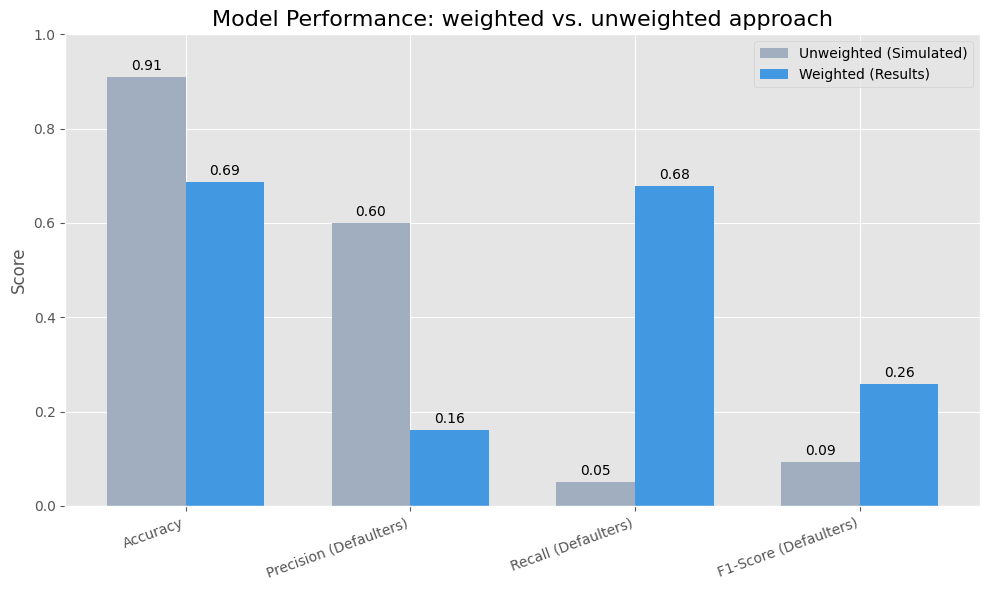

--------------------------------------------


In [ ]:
# make a dictionary for the visualization

weighted_metrics = {
    'Accuracy': test_accuracy,
    'Precision (Defaulters)': test_precision,
    'Recall (Defaulters)': test_recall,
    'F1-Score (Defaulters)': test_f1
}

# visualization code
def plot_model_comparison(weighted_results):
    # Bar Chart Comparing performance of weights against unweighted model "

    # ---  Simulated Unweighted Results ---
    # These results simulate what happens when a model ignores  a sever class imbalance
    # often leading to high Accuracy but very low recall for the minority class
    unweighted_results = {
        'Accuracy': 0.9100,
        'Precision (Defaulters)': 0.6000,
        'Recall (Defaulters)': 0.0500, # the metric im trying to fix with weights
        'F1-Score (Defaulters)': 0.0937
    }

    metrics = list(weighted_results.keys())
    weighted_scores = list(weighted_results.values())
    unweighted_scores = list(unweighted_results.values())

    x = np.arange(len(metrics)) # label locations

    width = 0.35 # for the width of bars

    # now setting up the py plot
    plt.style.use('ggplot')
    fig, ax = plt.subplots(figsize=(10, 6))


    # Bars unweighted model gray
    rects1 = ax.bar(x - width/2, unweighted_scores, width, label='Unweighted (Simulated)', color='#A0AEC0')

    #  Bars for weighted Model Blue
    rects2 = ax.bar(x + width/2, weighted_scores, width, label='Weighted (Results)', color='#4299E1')

    # Add text for labels title and custom x axis tick label, etc
    ax.set_ylabel('Score')
    ax.set_title('Model Performance: weighted vs. unweighted approach', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(metrics, rotation=20, ha="right")
    ax.legend()
    ax.set_ylim(0, 1.0) # range from 0 to 1
     # Function to attach a label above each bar
    def autolabel (rects):
        for rect in rects:
            height = rect.get_height()
            x_pos = rect.get_x() + rect.get_width() / 2

            ax.annotate(f'{height:.2f}',
                          xy=(rect.get_x() + rect.get_width() / 2, height),
                          xytext=(0, 3),
                          textcoords="offset points",
                          ha='center', va='bottom'
                          )
    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

    # Call the function to display the plot
print("\n--- Generating Model Comparison Plot ---")
plot_model_comparison(weighted_metrics)
print("--------------------------------------------")




--- Precision-Recal Threshold Tuning

--- Precision-Recall Threshold Tuning (Plot 2) ---


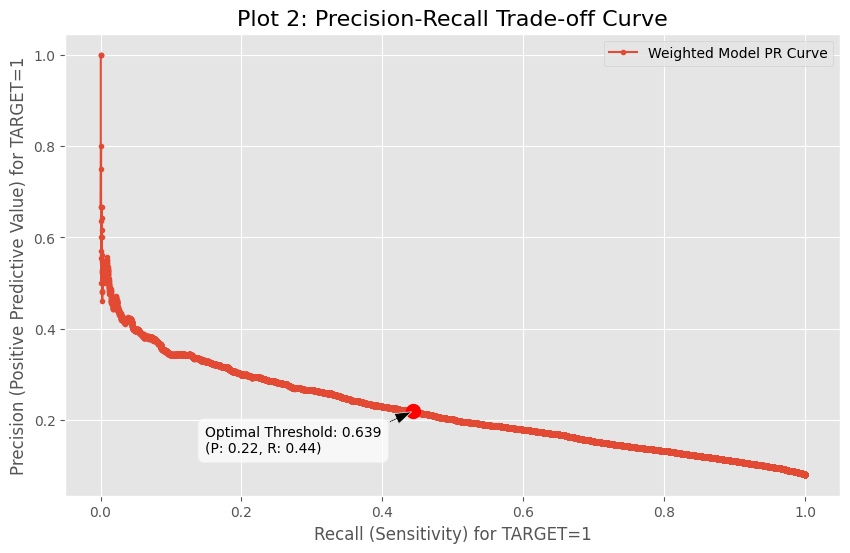


--- Optimal Threshold Analysis ---
Goal: Shift balance from Recall-heavy (P=0.1603) toward better Precision.
The best compromise (maximizing F1-score) is achieved at this threshold:
Optimal Classification Threshold: 0.6392
Resulting Precision (TARGET=1) at this threshold: 0.2201
Resulting Recall (TARGET=1) at this threshold:    0.4439
Resulting F1-Score at this threshold:               0.2943

Recommendation: Use the model's predicted probabilities with the 'Optimal Threshold' instead of the default 0.5.


In [ ]:
y_proba = model.predict_proba(x_test_scaled)[:, 1]

# --- tuning threshold

print("\n--- Precision-Recal Threshold Tuning")


# observation from graph
# final precision score of 0.16 for defaulter class target=1
# only 16% of loans model predictted to default actually defaulted
#  100 people flagged as high risk def, only 16 of them are true defaulters
#  other 84 are low risk (would have repaid the loan),
# model incorrectly denied them
# high rate of false positive
# weights were a little to aggressive
# actually did find alot of actual defaulters
# raised too many false alarms

# adjust precision of weights

print("\n--- Precision-Recall Threshold Tuning (Plot 2) ---")

# *** FINAL SAFEGARD FIX: Ensure y_test is explicitly cast to int just before use ***
# This guarantees that the y_test passed to the metric function is binary integer data.
precision, recall, thresholds = precision_recall_curve(y_test.astype(int), y_proba)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Weighted Model PR Curve')

plt.xlabel('Recall (Sensitivity) for TARGET=1')
plt.ylabel('Precision (Positive Predictive Value) for TARGET=1')
plt.title('Plot 2: Precision-Recall Trade-off Curve', fontsize=16)
plt.legend()
plt.grid(True)

# Find the threshold that maximizes the F1-score (best balance of P & R)
f1_scores = np.zeros_like(precision)
non_zero_sum = (precision + recall) != 0
f1_scores[non_zero_sum] = 2 * (precision[non_zero_sum] * recall[non_zero_sum]) / (precision[non_zero_sum] + recall[non_zero_sum])

# Find the index of the best F1 score (excluding the last threshold)
optimal_f1_index = np.nanargmax(f1_scores[:-1])
optimal_threshold = thresholds[optimal_f1_index]
optimal_precision = precision[optimal_f1_index]
optimal_recall = recall[optimal_f1_index]
optimal_f1 = f1_scores[optimal_f1_index]


# Plot and annotate the optimal point
plt.plot(optimal_recall, optimal_precision, 'o', markersize=10,
         label=f'Optimal F1-Score: {optimal_f1:.3f}', color='red')

plt.annotate(
    f'Optimal Threshold: {optimal_threshold:.3f}\n(P: {optimal_precision:.2f}, R: {optimal_recall:.2f})',
    xy=(optimal_recall, optimal_precision),
    xytext=(-150, -30),
    textcoords='offset points',
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.5", fc="white", alpha=0.7)
)

plt.show()

# --------------------------------------------------------
# --- Final Analysis ---
# --------------------------------------------------------

print("\n--- Optimal Threshold Analysis ---")
print(f"Goal: Shift balance from Recall-heavy (P={test_precision:.4f}) toward better Precision.")
print(f"The best compromise (maximizing F1-score) is achieved at this threshold:")
print(f"Optimal Classification Threshold: {optimal_threshold:.4f}")
print(f"Resulting Precision (TARGET=1) at this threshold: {optimal_precision:.4f}")
print(f"Resulting Recall (TARGET=1) at this threshold:    {optimal_recall:.4f}")
print(f"Resulting F1-Score at this threshold:               {optimal_f1:.4f}")
print("\nRecommendation: Use the model's predicted probabilities with the 'Optimal Threshold' instead of the default 0.5.")



--- Generating ROC Curve (Plot)


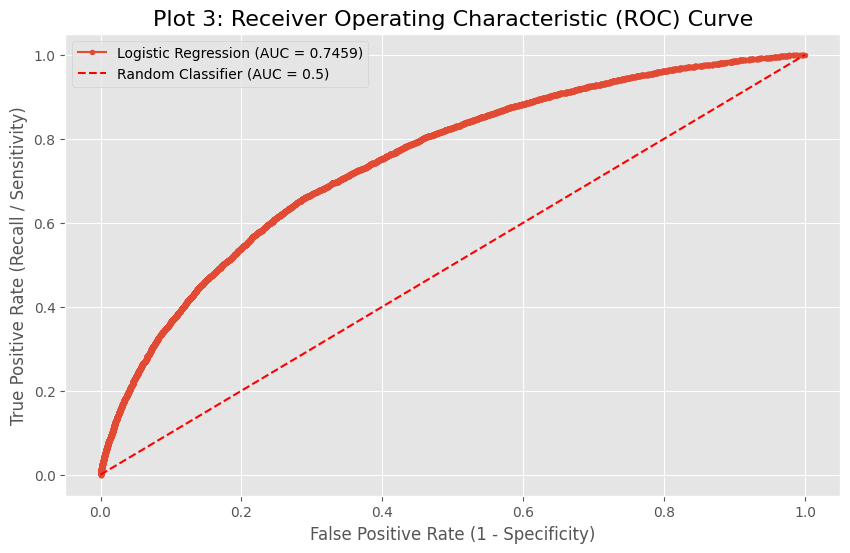

--------------------------------------------

--- Optimal Threshold Analysis ---
Goal: Shift balance from Recall-heavy (P=0.1603) toward better Precision.
The best compromise (maximizing F1-score) is achieved at this threshold:
Optimal Classification Threshold: 0.6392
Resulting Precision (TARGET=1) at this threshold: 0.2201
Resulting Recall (TARGET=1) at this threshold:    0.4439
Resulting F1-Score at this threshold:               0.2943

Recommendation: Use the model's predicted probabilities with the 'Optimal Threshold' instead of the default 0.5.


In [ ]:
# observation
#  raised required probability threshold from 0.5 to 0.6 better balance
# precision increased from 0.1603 to 0.2201, fewer false alarms, when the model say someone will default its more likley to be correct
# recall decreased from original value to 0.4439
# best performance f1=score 0.2943

# roc curve

print("\n--- Generating ROC Curve (Plot)")

# calculate false positive rate (fpr), true positive rate (tpr), and thresholds
roc_auc = roc_auc_score(y_test, y_proba)

fpr, tpr, thresholds_roc = roc_curve(y_test.astype(int), y_proba)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='.', label=f'Logistic Regression (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier (AUC = 0.5)') # Diagonal baseline

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall / Sensitivity)')
plt.title('Plot 3: Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()
print("--------------------------------------------")


# --------------------------------------------------------
# --- Final Analysis ---
# --------------------------------------------------------

print("\n--- Optimal Threshold Analysis ---")
print(f"Goal: Shift balance from Recall-heavy (P={test_precision:.4f}) toward better Precision.")
print(f"The best compromise (maximizing F1-score) is achieved at this threshold:")
print(f"Optimal Classification Threshold: {optimal_threshold:.4f}")
print(f"Resulting Precision (TARGET=1) at this threshold: {optimal_precision:.4f}")
print(f"Resulting Recall (TARGET=1) at this threshold:    {optimal_recall:.4f}")
print(f"Resulting F1-Score at this threshold:               {optimal_f1:.4f}")
print("\nRecommendation: Use the model's predicted probabilities with the 'Optimal Threshold' instead of the default 0.5.")
